In [ ]:
# Diagnose SoEu paid net bookings

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

In [4]:
# Read in data
df = pd.read_csv("/users/akuppam/documents/Hprog/R/Prophet/rnb1015.csv")
df.head(5)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [ ]:
df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

In [5]:
df_soeu = df.loc[(df['region'] == 'SoEu') & (df['marketing'] == 'Paid')]

In [7]:
df_soeu.head(3)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
7,2016-01-01,SoEu,Paid,36015,12,928,7,0,7,0.0,193.189576,866610
17,2016-01-02,SoEu,Paid,49711,13,1190,13,0,13,0.0,384.059518,866025
27,2016-01-03,SoEu,Paid,64938,28,1767,14,3,11,0.0,39.882147,864342


In [17]:
df_soeu.describe()

,visits,br,inq,gb,cb,nb,ss,ts,listings
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1.019000e+03
mean,75323.031403,127.437684,1870.481845,71.300294,10.877331,60.422964,274.992046,4891.324946,1.258473e+06
std,30668.661438,59.993490,1373.247034,33.129444,8.420766,28.531110,611.260040,3749.940108,2.592105e+05
min,13699.000000,12.000000,227.000000,7.000000,0.000000,-55.000000,0.000000,-13107.894210,1.688280e+05
25%,54087.000000,77.000000,769.500000,43.500000,5.000000,38.000000,0.000000,1778.225913,1.116910e+06
50%,71396.000000,126.000000,1305.000000,71.000000,10.000000,60.000000,0.000000,3805.584926,1.294740e+06
75%,93718.500000,171.500000,2777.000000,97.000000,15.000000,81.000000,0.000000,7491.486037,1.429740e+06
max,189138.000000,340.000000,7011.000000,168.000000,145.000000,148.000000,5274.656665,18210.860160,1.710540e+06


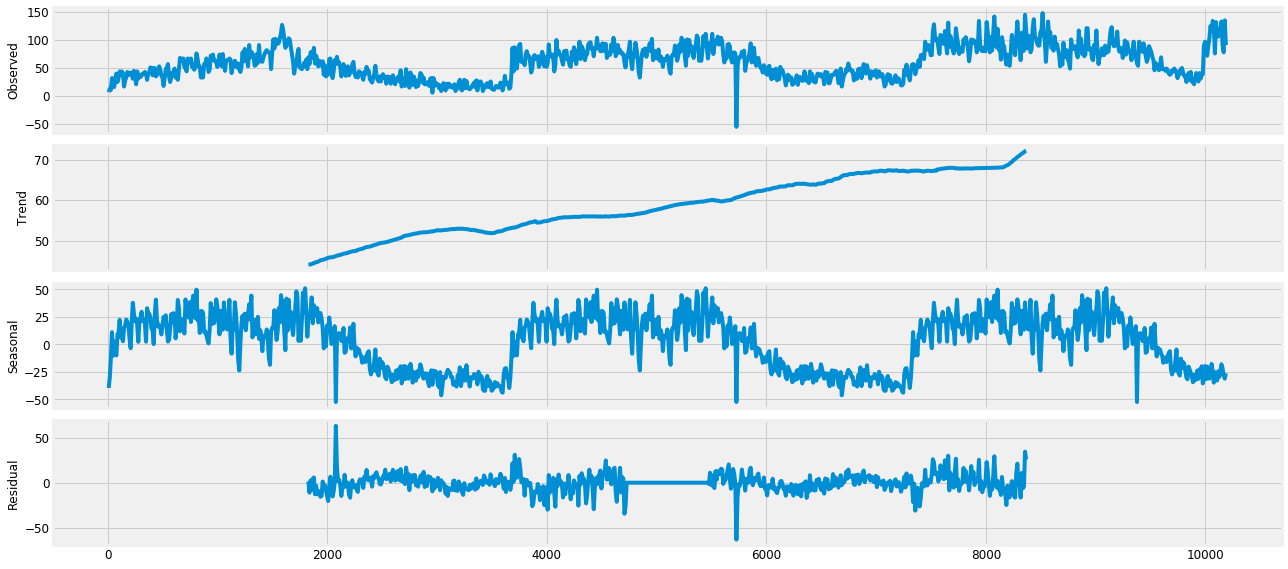

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

df_soeu_add = sm.tsa.seasonal_decompose(df_soeu['nb'], model='additive', freq = 365)
fig = df_soeu_add.plot()
plt.show()

In [11]:
df_soeu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 7 to 10187
Data columns (total 12 columns):
date         1019 non-null object
region       1019 non-null object
marketing    1019 non-null object
visits       1019 non-null int64
br           1019 non-null int64
inq          1019 non-null int64
gb           1019 non-null int64
cb           1019 non-null int64
nb           1019 non-null int64
ss           1019 non-null float64
ts           1019 non-null float64
listings     1019 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 103.5+ KB


In [12]:
df_soeu = df_soeu.set_index('date')

In [13]:
df_soeu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 2016-01-01 to 2018-10-15
Data columns (total 11 columns):
region       1019 non-null object
marketing    1019 non-null object
visits       1019 non-null int64
br           1019 non-null int64
inq          1019 non-null int64
gb           1019 non-null int64
cb           1019 non-null int64
nb           1019 non-null int64
ss           1019 non-null float64
ts           1019 non-null float64
listings     1019 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 95.5+ KB


In [14]:
df_soeu.index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10',
       '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15'],
      dtype='object', name='date', length=1019)

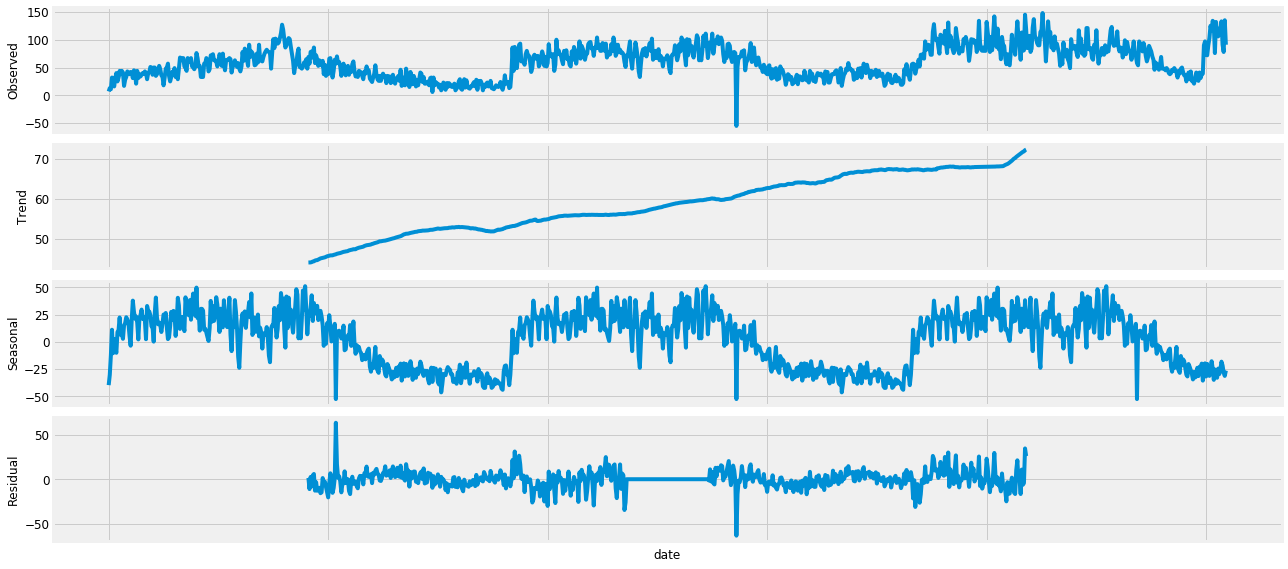

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

df_soeu_add = sm.tsa.seasonal_decompose(df_soeu['nb'], model='additive', freq = 365)
fig = df_soeu_add.plot()
plt.show()

In [ ]:
import pandas as pd
import csv
import glob
import os
path = '.'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]
for filenames in files_in_dir:
    df = pd.read_csv(filenames)
    df.to_csv('out.csv', mode='a')

In [5]:
import pandas as pd
import csv
import glob
import os

path = '/users/akuppam/documents/Hprog/R/Prophet/Test1noHols/'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for filenames in files_in_dir:
    df = pd.read_csv(filenames)
    df.to_csv('out.csv', mode='a')
    

In [6]:
df.head()

NameError: name 'df' is not defined

In [7]:
files_in_dir

[]

In [8]:
from collections import OrderedDict
import os
from glob import iglob
import csv

files = sorted(iglob('*.csv'))
header = OrderedDict()
data = []

for filename in files:
    with open(filename, 'r') as fin:
        csvin = csv.DictReader(fin)
        header.update(OrderedDict.fromkeys(csvin.fieldnames))
        data.append(next(csvin))
with open('output_filename_version2.csv', 'w', newline='') as fout:
    csvout = csv.DictWriter(fout, fieldnames=list(header))
    csvout.writeheader()
    csvout.writerows(data)

In [ ]:
# Create the list of file names: 
filenames = ['A/a.csv', 'B/b.csv', 'C/c.csv']
 
# Create the list for the three DataFrames you want to create:
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))
 
# Print top 5 rows of the 1st DataFrame in dataframes
print(dataframes[0].head())


In [17]:
# Create the list of file names: 
filenames = ['/users/akuppam/documents/Hprog/R/Prophet/Test1noHols/AMR_paid/MAPE_by_model.csv', 
             '/users/akuppam/documents/Hprog/R/Prophet/Test1noHols/AMR_nonpaid/MAPE_by_model.csv',
             '/users/akuppam/documents/Hprog/R/Prophet/Test1noHols/UK_nonpaid/MAPE_by_model.csv']
 
# Create the list for the three DataFrames you want to create:
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))
 
# Print top 5 rows of the 1st DataFrame in dataframes
print(dataframes[0].head())


   Unnamed: 0        ts_model      mape
0           1         prophet  0.141200
1           2      prophet_br  0.028037
2           3    prophet_brli  0.028117
3           4    prophet_vibr  0.028031
4           5  prophet_vibrli  0.028170


In [18]:
dataframes

[   Unnamed: 0        ts_model      mape
 0           1         prophet  0.141200
 1           2      prophet_br  0.028037
 2           3    prophet_brli  0.028117
 3           4    prophet_vibr  0.028031
 4           5  prophet_vibrli  0.028170
 5           6  prophet_visits  0.070504
 6           7              hw  0.060088
 7           8           arima  0.052637,
    Unnamed: 0        ts_model      mape
 0           1         prophet  0.076482
 1           2      prophet_br  0.030162
 2           3    prophet_brli  0.030195
 3           4    prophet_vibr  0.030275
 4           5  prophet_vibrli  0.030260
 5           6  prophet_visits  0.052743
 6           7              hw  0.056571
 7           8           arima  0.049034,
    Unnamed: 0        ts_model      mape
 0           1         prophet  0.118736
 1           2      prophet_br  0.051931
 2           3    prophet_brli  0.051980
 3           4    prophet_vibr  0.051967
 4           5  prophet_vibrli  0.051970
 5           6